In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("svaningelgem/crypto-currencies-daily-prices")

In [3]:
import os

data_list = os.listdir(path)
df = pd.DataFrame()

for it in data_list:
    name = it.split('.')[0]
    df = pd.concat([df,pd.read_csv(os.path.join(path,it))], axis=0)

In [4]:
df.head()

,ticker,date,open,high,low,close
0,HBAR,2019-09-20,0.05058,0.05638,0.04986,0.05159
1,HBAR,2019-09-21,0.05159,0.05484,0.04545,0.04814
2,HBAR,2019-09-22,0.04814,0.04858,0.03844,0.03924
3,HBAR,2019-09-23,0.03924,0.03924,0.03403,0.03791
4,HBAR,2019-09-24,0.03791,0.04041,0.02870,0.02947


In [5]:
df[df['ticker'] == 'BTC']

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921
...,...,...,...,...,...,...
5255,BTC,2024-12-05,98298.20000,104062.00000,93081.30000,96751.80000
5256,BTC,2024-12-06,96789.00000,102079.00000,95560.60000,100648.00000
5257,BTC,2024-12-07,100648.00000,100724.00000,99087.60000,99717.70000
5258,BTC,2024-12-08,99717.70000,100548.00000,98767.20000,100276.00000


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Min-max scaling for numerical columns
numeric_columns = ['open', 'high', 'low', 'close']
scaler = MinMaxScaler()

# Group by ticker and scale each group separately
for ticker in df['ticker'].unique():
    mask = df['ticker'] == ticker
    df.loc[mask, numeric_columns] = scaler.fit_transform(df.loc[mask, numeric_columns])


<Axes: >

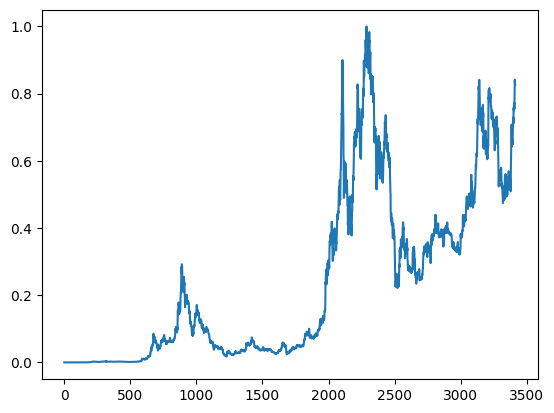

In [13]:
df[df['ticker'] == 'ETH'].high.plot()

## BTC

<Axes: >

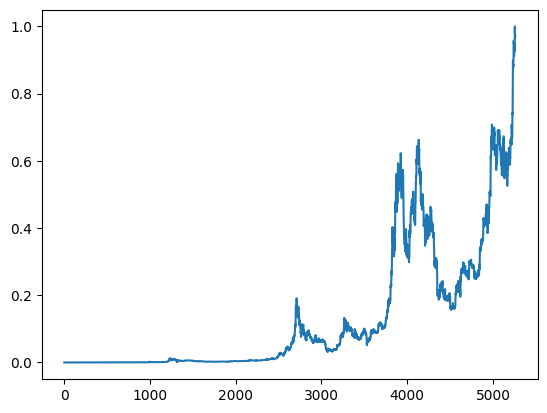

In [7]:
df[df['ticker'] == 'BTC'].high.plot()

In [9]:
btc = df[df['ticker'] == 'BTC']

<Axes: >

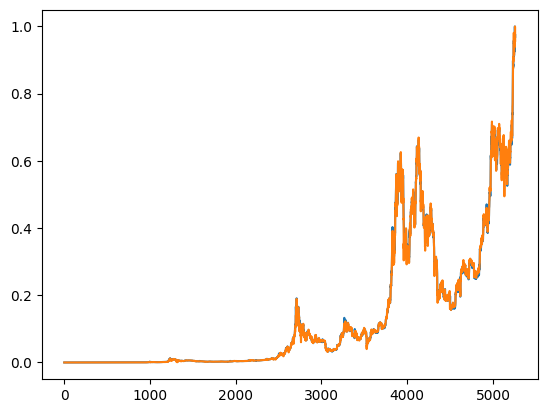

In [14]:
btc.high.plot()

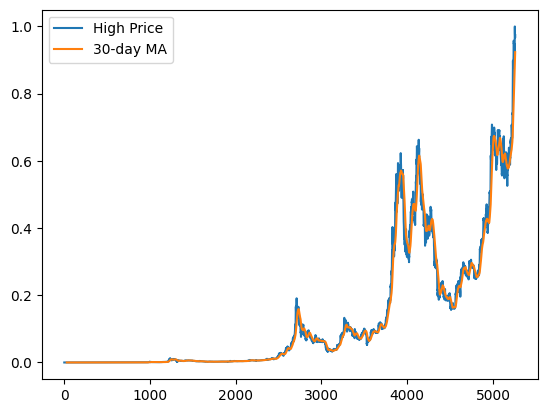

In [17]:
# Plot original high price
btc.high.plot(label='High Price')

# Add 7-day moving average
# btc.high.rolling(window=7).mean().plot(label='7-day MA')

# Add 30-day moving average 
btc.high.rolling(window=30).mean().plot(label='30-day MA')

plt.legend()

In [31]:
# scaling
scaler.fit_transform(btc.high[1200:1250].values.reshape(-1, 1))

array([[1.59679084e-03],
       [1.58705431e-03],
       [1.26574884e-04],
       [8.76287656e-05],
       [0.00000000e+00],
       [1.17714642e-02],
       [2.34845092e-02],
       [4.28504664e-02],
       [5.61408292e-02],
       [1.06468950e-01],
       [1.39368683e-01],
       [1.75384106e-01],
       [1.53506124e-01],
       [1.56884700e-01],
       [1.72268417e-01],
       [2.24047281e-01],
       [2.26500886e-01],
       [2.36656086e-01],
       [2.55174965e-01],
       [3.13409148e-01],
       [5.57971297e-01],
       [6.67984344e-01],
       [4.23665609e-01],
       [5.54456410e-01],
       [5.91133916e-01],
       [6.57381263e-01],
       [6.23264464e-01],
       [6.18396199e-01],
       [7.40073608e-01],
       [8.56736705e-01],
       [9.83019493e-01],
       [1.00000000e+00],
       [9.91256596e-01],
       [9.75580784e-01],
       [8.79082040e-01],
       [9.45193075e-01],
       [9.97838490e-01],
       [9.97994275e-01],
       [8.80250424e-01],
       [6.63155025e-01],


<Axes: >

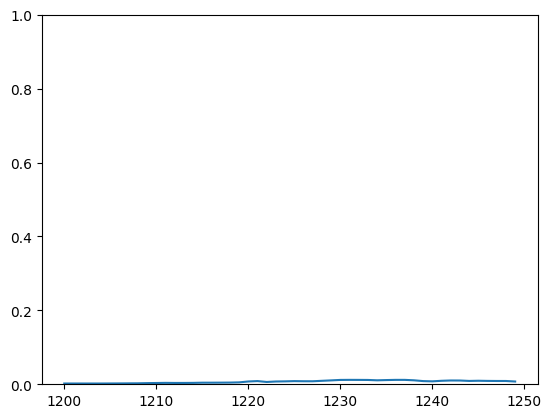

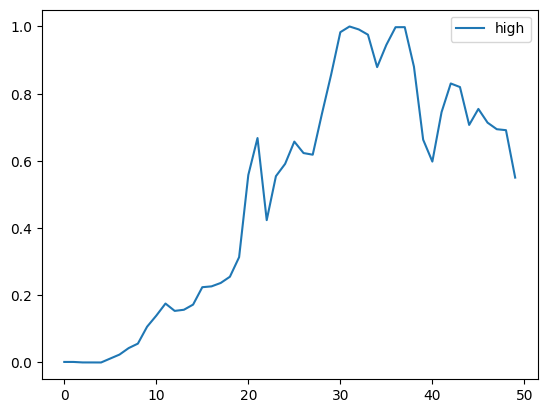

In [22]:
btc.high[1200:1250].plot(ylim=(0,1))
pd.DataFrame(scaler.fit_transform(btc.high[1200:1250].values.reshape(-1, 1)), columns=['high']).plot()


In [11]:
btc.isna().sum()

ticker    0
date      0
open      0
high      0
low       0
close     0
dtype: int64

In [12]:
btc.describe()

,open,high,low,close
count,5260.000000,5260.000000,5260.000000,5260.000000
mean,0.135164,0.133862,0.133850,0.135351
std,0.197810,0.195701,0.196212,0.198136
min,0.000000,0.000000,0.000000,0.000000
25%,0.002342,0.002305,0.002338,0.002343
50%,0.036247,0.035948,0.036222,0.036260
75%,0.202168,0.200589,0.200542,0.202240
max,1.000000,1.000000,1.000000,1.000000


## NN

In [23]:
import torch 
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [25]:
btc.high.values.reshape(-1, 1)

array([0.00000000e+00, 3.49215057e-07, 4.18596805e-07, ...,
       9.67922954e-01, 9.66231654e-01, 9.74486352e-01])

In [26]:
train_data = btc.high.values.reshape(-1, 1)[:-100]
test_data = btc.high.values.reshape(-1, 1)[-100:]

In [30]:
btc.shape

(5260, 6)

In [ ]:
x_freq = 20
y_freq = 2

for 